In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder

#model selection:
from sklearn.model_selection import train_test_split
# K-folds
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import Gridremove these columns for all months from the data set

ls_total_ic_cols = telecom_data.columns[telecom_data.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]

print(ls_total_ic_cols)

telecom_data.drop(ls_total_ic_cols,axis=1,inplace=True)SearchCV

import gc

# filtering warnings
import os
import warnings
warnings.filterwarnings('ignore')



In [127]:
telecom_data = pd.read_csv('telecom_churn_data.csv')

In [128]:
telecom_data

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [129]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [130]:
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [131]:

recharge_amnt_columns =  telecom_data.columns[telecom_data.columns.str.contains('rech_amt|rech_data')]

print(recharge_amnt_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [132]:
# check if there are any missing values for recharge amount
100*telecom_data.loc[:,recharge_amnt_columns].isnull().sum()/len(telecom_data)

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

we observe that approx 73-75% values for average recharge amount, max recharge data and total recharge date and date of data recharge for mobile internet data is missing

In [133]:
recharge_amnt_columns_6 = telecom_data.columns[telecom_data.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]

telecom_data.loc[:,recharge_amnt_columns_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,99999.000000,99999.000000,25153.000000,25153.000000,25153.000000
mean,327.514615,104.637486,2.463802,126.393392,192.600982
std,398.019701,120.614894,2.789128,108.477235,192.646318
min,0.000000,0.000000,1.000000,1.000000,1.000000
25%,109.000000,30.000000,1.000000,25.000000,82.000000
50%,230.000000,110.000000,1.000000,145.000000,154.000000
75%,437.500000,120.000000,3.000000,177.000000,252.000000
max,35190.000000,4010.000000,61.000000,1555.000000,7546.000000


In [134]:
# av_rech_amt_data_6 is NA
is_invalid_data_6 = telecom_data['av_rech_amt_data_6'] == np.nan
is_invalid_data_7 = telecom_data['av_rech_amt_data_7'] == np.nan
is_invalid_data_8 = telecom_data['av_rech_amt_data_7'] == np.nan

print(telecom_data.loc[is_invalid_data_6,'total_rech_data_6'].sum())
print(telecom_data.loc[is_invalid_data_7,'total_rech_data_7'].sum())
print(telecom_data.loc[is_invalid_data_8,'total_rech_data_8'].sum())

# total_rech_data_6 is NA
is_invalid_data_6 = telecom_data['total_rech_data_6'] == np.nan 
is_invalid_data_7 = telecom_data['total_rech_data_7'] == np.nan 
is_invalid_data_8 = telecom_data['total_rech_data_8'] == np.nan 

# av_rech_amt_data_6
print(telecom_data.loc[is_invalid_data_6,'av_rech_amt_data_6'].sum())
print(telecom_data.loc[is_invalid_data_7,'av_rech_amt_data_7'].sum())
print(telecom_data.loc[is_invalid_data_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


In [135]:
telecom_data.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']]= \
telecom_data.loc[:,['total_rech_data_6','total_rech_data_7','total_rech_data_8']].replace(np.NaN,0)

In [136]:
telecom_data.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']]= \
telecom_data.loc[:,['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.NaN,0)

In [137]:
# add a new derived variable total recharge amount for data: total_rech_amt_data
telecom_data['total_rech_amt_data_6'] = telecom_data.av_rech_amt_data_6*telecom_data.total_rech_data_6
telecom_data['total_rech_amt_data_7'] = telecom_data.av_rech_amt_data_7*telecom_data.total_rech_data_7
telecom_data['total_rech_amt_data_8'] = telecom_data.av_rech_amt_data_8*telecom_data.total_rech_data_8

In [138]:
telecom_data['total_avg_rech_amnt_good_ph'] = (telecom_data.total_rech_amt_6 +telecom_data.total_rech_amt_data_6 \
                                               + telecom_data.total_rech_amt_7+telecom_data.total_rech_amt_data_7)/4

High Value Customer as those who have total average recharge amount for good phase greater than the 75th percentile value.

In [139]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = telecom_data.total_avg_rech_amnt_good_ph >= telecom_data.total_avg_rech_amnt_good_ph.quantile(0.75)

In [140]:
telecom_data = telecom_data.loc[high_value_filter,:]

In [141]:
# check how many records remain
len(telecom_data.loc[high_value_filter,:])

25020

# lables for churned customers


In [142]:
# Initially set all the values as 0
telecom_data['churn']= 0

In [143]:
# the following columns will be used to find the churned customers in the 9th month 
ls_9 = ['total_ic_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']
100*telecom_data.loc[:,ls_9].isnull().sum()/len(telecom_data)

total_ic_mou_9    0.0
total_ic_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [144]:
# define is_churned boolean flag for customers where above values are zero
is_churned = (telecom_data.total_ic_mou_9 == 0) & (telecom_data.total_ic_mou_9 == 0) & (telecom_data.vol_2g_mb_9 ==0)& \
(telecom_data.vol_3g_mb_9 ==0)

In [145]:
# set all such rows fulfilling is_churned condition as 1
telecom_data.loc[is_churned,'churn']=1

In [146]:
# check what's the % of churned customers
100*telecom_data.churn.sum()/len(is_churned)

8.2414068745004

We see that approx. 6.6% of high value customers have churned

In [147]:
# extract all list of 9th Month (churned month) Columns
month_9_columns =  telecom_data.columns[telecom_data.columns.str.contains('_9')]

In [148]:
# drop all columns corresponding to the attributes of churn phase
telecom_data.drop(month_9_columns,axis=1,inplace=True)

In [149]:
#check how many columns remain
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25020 entries, 0 to 99997
Columns: 177 entries, mobile_number to churn
dtypes: float64(140), int64(28), object(9)
memory usage: 34.0+ MB


In [150]:
100*telecom_data.isnull().sum()/len(telecom_data.index)

mobile_number                   0.000000
circle_id                       0.000000
loc_og_t2o_mou                  0.655476
std_og_t2o_mou                  0.655476
loc_ic_t2o_mou                  0.655476
last_date_of_month_6            0.000000
last_date_of_month_7            0.087930
last_date_of_month_8            0.531575
arpu_6                          0.000000
arpu_7                          0.000000
arpu_8                          0.000000
onnet_mou_6                     1.630695
onnet_mou_7                     1.622702
onnet_mou_8                     3.617106
offnet_mou_6                    1.630695
offnet_mou_7                    1.622702
offnet_mou_8                    3.617106
roam_ic_mou_6                   1.630695
roam_ic_mou_7                   1.622702
roam_ic_mou_8                   3.617106
roam_og_mou_6                   1.630695
roam_og_mou_7                   1.622702
roam_og_mou_8                   3.617106
loc_og_t2t_mou_6                1.630695
loc_og_t2t_mou_7

In [151]:
# create function to anlyze the features across 6th, 7th and 8th month
def analyze_feature(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": telecom_data[telecom_data["churn"] == churn][cols[6]].mean(),
        "mean_7": telecom_data[telecom_data["churn"] == churn][cols[7]].mean(),
        "mean_8": telecom_data[telecom_data["churn"] == churn][cols[8]].mean(),
        "std_6": telecom_data[telecom_data["churn"] == churn][cols[6]].std(),
        "std_7": telecom_data[telecom_data["churn"] == churn][cols[7]].std(),
        "std_8": telecom_data[telecom_data["churn"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=telecom_data, y=feature_start + "_6", x="churn",
                hue="churn", linewidth=, showfliers=False, ax=axes[0])
    sns.boxplot(data=telecom_data, y=feature_start + "_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=telecom_data, y=feature_start + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2)

SyntaxError: invalid syntax (<ipython-input-151-968c299f8fe4>, line 20)

In [ ]:
#extract the recharge amount related columns
recharge_amnt_columns =  telecom_data.columns[telecom_data.columns.str.contains('rech_amt')]

recharge_amnt_columns

In [ ]:
#analyze total recharge amount:
analyze_feature('total_rech_amt')

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_data_6', 7: 'total_rech_amt_data_7', 8: 'total_rech_amt_data_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,535.34,634.49,565.16,1571.94,1624.83,1823.75
Non Churned,470.17,400.23,93.63,1143.63,1279.40,514.70


<Figure size 1224x504 with 0 Axes>

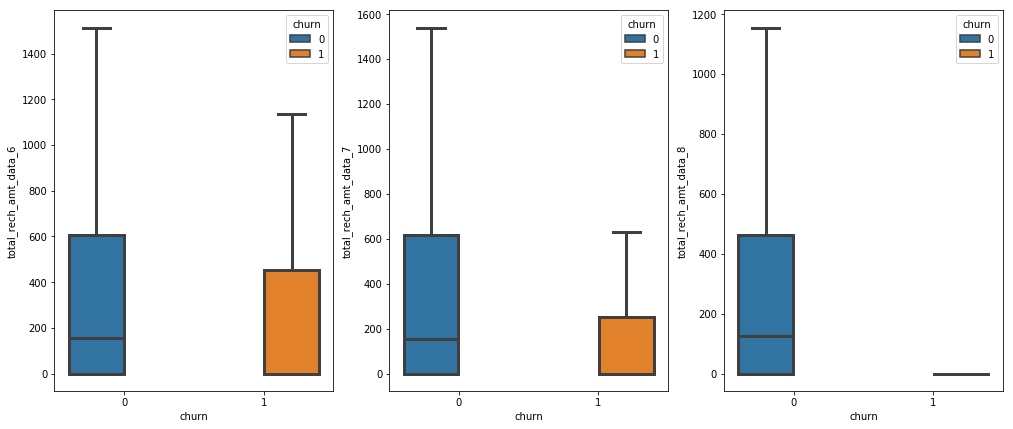

In [152]:
# analyze total recharge amount for data:
analyze_feature('total_rech_amt_data')

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,173.75,179.70,171.99,178.06,185.72,177.90
Non Churned,178.91,169.29,94.70,220.98,242.10,187.83


<Figure size 1224x504 with 0 Axes>

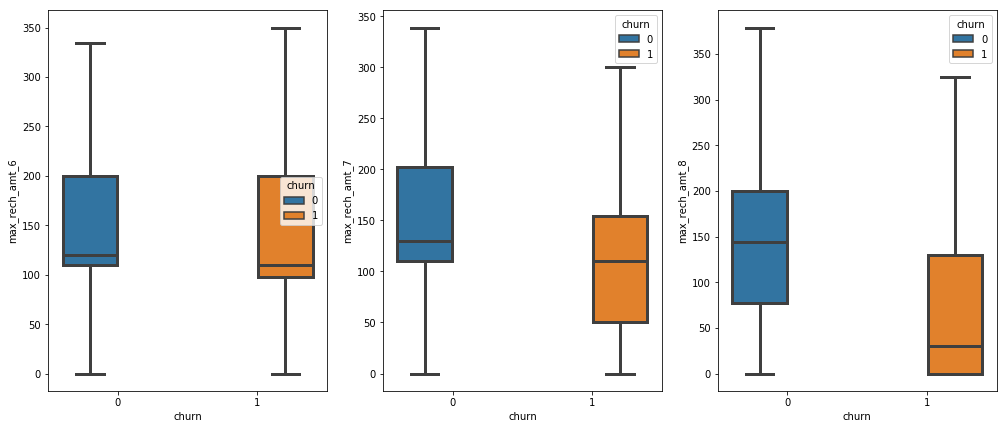

In [153]:
# analyze maximum recharge amount for data:
analyze_feature('max_rech_amt')

We observe drop in maximum recharge amount and total recharge amount data.

In [154]:
# drop av_rech_amt_data and total_rech_data columns as total_rech_amt_data derived using these columns.
telecom_data.drop(['av_rech_amt_data_6','av_rech_amt_data_7'
                   ,'av_rech_amt_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8'],axis=1,inplace=True)

In [155]:
# define 3 new derived columns

telecom_data['total_rech_amt_good_ph'] = (telecom_data.total_rech_amt_6 + telecom_data.total_rech_amt_7)/2
telecom_data['total_rech_amt_data_good_ph'] = (telecom_data.total_rech_amt_data_6 + telecom_data.total_rech_amt_data_7)/2
telecom_data['max_rech_amt_good_ph'] = (telecom_data.max_rech_amt_6 + telecom_data.max_rech_amt_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['total_rech_amt_6','total_rech_amt_7'
              ,'max_rech_amt_6','max_rech_amt_7','total_rech_amt_data_6','total_rech_amt_data_7'],axis=1,inplace=True)

# also drop total_avg_rech_amnt_good_ph as we are using the component columns defined above
telecom_data.drop('total_avg_rech_amnt_good_ph',axis=1,inplace=True)

In [156]:
# extract the last day recharge amount columns
last_day_rech_amt = telecom_data.columns[telecom_data.columns.str.contains('day')]

Churn Stats (mean and standard deviation):
{6: 'last_day_rch_amt_6', 7: 'last_day_rch_amt_7', 8: 'last_day_rch_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,103.06,106.26,99.61,144.64,145.73,149.94
Non Churned,110.91,86.51,40.00,185.28,168.58,135.35


<Figure size 1224x504 with 0 Axes>

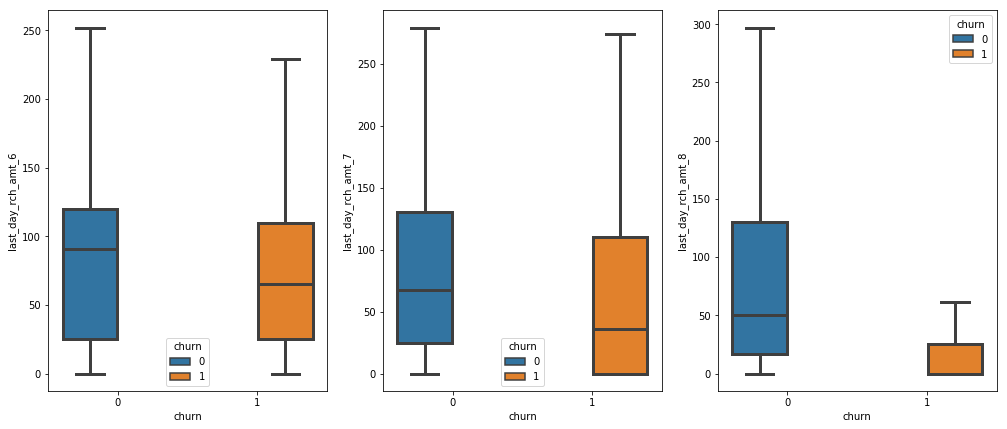

In [157]:
#check the mean variation in last day recharge for churned and non churned customers
analyze_feature('last_day_rch_amt')


We can see that there is a significant drop in last month recharge amount for churned customers.

In [158]:
#define new derived column
# last day recharge amount for good phase: last_day_rch_amt_good_ph
telecom_data['last_day_rch_amt_good_ph'] = (telecom_data.last_day_rch_amt_6 + telecom_data.last_day_rch_amt_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1,inplace=True)

In [159]:
# check other recharge related variables:
ls_recharge = telecom_data.columns[telecom_data.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [160]:
# check the % of NA values for recharge related variables
100*telecom_data.loc[:,ls_recharge].isnull().sum()/len(telecom_data)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     40.219824
max_rech_data_7     39.292566
max_rech_data_8     43.497202
dtype: float64

In [161]:
# check the distribution for max_rech_data
telecom_data.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,14957.000000,15189.000000,14137.000000
mean,140.461055,141.895582,138.022070
std,121.375996,123.665247,122.339973
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000



We see that the minimum value is 1 while the max is 1555 across months, which implies the missing values are cases where there was no recharge for data, let's impute the missing values by 0 indicating no recharge.

In [162]:
telecom_data.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= telecom_data.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

In [163]:
# define new derived column
# maximum recharge for data for good phase: max_rech_data_good_ph
telecom_data['max_rech_data_good_ph'] = (telecom_data.max_rech_data_6 + telecom_data.max_rech_data_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)

In [164]:
# let's check total recharge number
ls_tot_recharge_num = telecom_data.columns[telecom_data.columns.str.contains('total_rech_num')]

# check the summary stats:
print(telecom_data.loc[:,ls_tot_recharge_num].describe())

# let's check the median variation in total recharge numbers for churned and non churned customers
pd.DataFrame([telecom_data.loc[telecom_data.churn==0,ls_tot_recharge_num].median()
              ,telecom_data.loc[telecom_data.churn==1,ls_tot_recharge_num].median()],index={'Non Churned','Churned'})

       total_rech_num_6  total_rech_num_7  total_rech_num_8
count      25020.000000      25020.000000      25020.000000
mean          12.376739         12.207474         10.303157
std            9.744005          9.699720          9.493941
min            0.000000          0.000000          0.000000
25%            6.000000          6.000000          4.000000
50%           10.000000         10.000000          8.000000
75%           15.000000         15.000000         13.000000
max          307.000000        138.000000        196.000000


,total_rech_num_6,total_rech_num_7,total_rech_num_8
Churned,10.0,10.0,8.0
Non Churned,12.0,9.0,4.0


In [165]:
# Let us define new derived column
# total recharge number for good phase: total_rech_num_good_ph
telecom_data['total_rech_num_good_ph'] = (telecom_data.total_rech_num_6 + telecom_data.total_rech_num_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['total_rech_num_6','total_rech_num_7'],axis=1,inplace=True)

2G and 3G usage related variables


In [166]:
# extract the 2G and 3G usage related columns
typ_2g_or_3g = telecom_data.columns[telecom_data.columns.str.contains('2g|3g',regex=True)]

In [167]:
#check the % of NA values present
telecom_data.loc[:,typ_2g_or_3g].isnull().sum()/len(telecom_data.loc[:,typ_2g_or_3g])

count_rech_2g_6    0.402198
count_rech_2g_7    0.392926
count_rech_2g_8    0.434972
count_rech_3g_6    0.402198
count_rech_3g_7    0.392926
count_rech_3g_8    0.434972
vol_2g_mb_6        0.000000
vol_2g_mb_7        0.000000
vol_2g_mb_8        0.000000
vol_3g_mb_6        0.000000
vol_3g_mb_7        0.000000
vol_3g_mb_8        0.000000
arpu_3g_6          0.402198
arpu_3g_7          0.392926
arpu_3g_8          0.434972
arpu_2g_6          0.402198
arpu_2g_7          0.392926
arpu_2g_8          0.434972
monthly_2g_6       0.000000
monthly_2g_7       0.000000
monthly_2g_8       0.000000
sachet_2g_6        0.000000
sachet_2g_7        0.000000
sachet_2g_8        0.000000
monthly_3g_6       0.000000
monthly_3g_7       0.000000
monthly_3g_8       0.000000
sachet_3g_6        0.000000
sachet_3g_7        0.000000
sachet_3g_8        0.000000
aug_vbc_3g         0.000000
jul_vbc_3g         0.000000
jun_vbc_3g         0.000000
sep_vbc_3g         0.000000
dtype: float64

In [168]:
#We see from above that about 60% values are not available for count of recharge and average revenue for 2G/3G per user. As we aleady have 2G/3G volume usage based data available,so drop these columns.
telecom_data.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [169]:
# extract volume of 2G and 3G usage columns
volume_of_usage_3g_and_2g = telecom_data.columns[telecom_data.columns.str.contains('vol_2g|vol_3g',regex=True)]

# check the summary stats:
print(telecom_data.loc[:,volume_of_usage_3g_and_2g].describe())

        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8   vol_3g_mb_6   vol_3g_mb_7  \
count  25020.000000  25020.000000  25020.000000  25020.000000  25020.000000   
mean     138.632823    136.331793    115.159749    387.858012    418.651703   
std      349.010093    348.364169    329.907526    982.838983    984.223047   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.480000      1.765000      0.000000      0.000000      0.000000   
75%      104.450000     96.472500     64.250000    446.432500    499.177500   
max    10285.900000   7873.550000  11117.610000  45735.400000  28144.120000   

        vol_3g_mb_8  
count  25020.000000  
mean     393.931503  
std      984.618491  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%      445.475000  
max    30036.060000  


In [170]:
# check the mean variation in volume of 2G/3G usage for churned and non churned customers
pd.DataFrame([telecom_data.loc[telecom_data.churn==0,volume_of_usage_3g_and_2g].mean()
              ,telecom_data.loc[telecom_data.churn==1,volume_of_usage_3g_and_2g].mean()],index={'Non Churned','Churned'})

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
Churned,140.177320,140.070863,123.179922,394.109015,433.471968,420.255485
Non Churned,121.436625,94.701552,25.864350,318.260281,253.645087,100.844224


We have two observations from above:
the 2G and 3G usage for churned customers drops in 8th month 
we also see that average 3G usage is higher for non-churned customers indicating that churned customers might be from areas where 3G service is not properly available.

In [171]:
# define two new derived columns
# 2G volume usage for good phase: vol_2g_mb_good_ph
# 3G volume usage for good phase: vol_3g_mb_good_ph
telecom_data['vol_2g_mb_good_ph'] = (telecom_data.vol_2g_mb_6 + telecom_data.vol_2g_mb_7)/2
telecom_data['vol_3g_mb_good_ph'] = (telecom_data.vol_3g_mb_6 + telecom_data.vol_3g_mb_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['vol_2g_mb_6','vol_2g_mb_7'
              ,'vol_3g_mb_6','vol_3g_mb_7'],axis=1,inplace=True)

In [172]:
# check monthly 2G/3G service schemes
monthly_2g_3g = telecom_data.columns[telecom_data.columns.str.contains('monthly_2g|monthly_3g',regex=True)]

# check the summary stats:
print(telecom_data.loc[:,monthly_2g_3g].describe())

       monthly_2g_6  monthly_2g_7  monthly_2g_8  monthly_3g_6  monthly_3g_7  \
count  25020.000000  25020.000000  25020.000000  25020.000000  25020.000000   
mean       0.185412      0.194205      0.160352      0.242046      0.257114   
std        0.451442      0.467128      0.415663      0.655195      0.706753   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        4.000000      5.000000      5.000000     14.000000     16.000000   

       monthly_3g_8  
count  25020.000000  
mean       0.233333  
std        0.655062  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       16.000000  


In [173]:
#check the mean variation in monthly schemes of 2G/3G usage for churned and non churned customers
pd.DataFrame([telecom_data.loc[telecom_data.churn==0,monthly_2g_3g].mean()
              ,telecom_data.loc[telecom_data.churn==1,monthly_2g_3g].mean()],index={'Non Churned','Churned'})

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Churned,0.193702,0.204896,0.172402,0.24449,0.265964,0.248976
Non Churned,0.093113,0.075170,0.026188,0.21484,0.158584,0.059166


In [174]:
# define two new derived columns
# 2G monthly for good phase: monthly_2g_good_ph
# 3G monthly for good phase: monthly_3g_good_ph
telecom_data['monthly_2g_good_ph'] = (telecom_data.monthly_2g_6 + telecom_data.monthly_2g_7)/2
telecom_data['monthly_3g_good_ph'] = (telecom_data.monthly_3g_6 + telecom_data.monthly_3g_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['monthly_2g_6','monthly_2g_7'
              ,'monthly_3g_6','monthly_3g_7'],axis=1,inplace=True)

Let's check for incoming mou variables

In [175]:
mou_ic_cols6 = telecom_data.columns[telecom_data.columns.str.contains('.*_ic_.*mou_6',regex=True)]

mou_ic_cols6

Index(['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6',
       'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

In [176]:
# As total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 already have component variables present in dataset
# let's remove these columns for all months from the data set

ls_total_ic_cols = telecom_data.columns[telecom_data.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]

print(ls_total_ic_cols)

telecom_data.drop(ls_total_ic_cols,axis=1,inplace=True)

Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8'],
      dtype='object')


In [177]:
# define good phase derive variables for all ic components:
telecom_data['spl_ic_mou_good_ph'] = (telecom_data.spl_ic_mou_6 + telecom_data.spl_ic_mou_7)/2
telecom_data['isd_ic_mou_good_ph'] = (telecom_data.isd_ic_mou_6 + telecom_data.isd_ic_mou_7)/2
telecom_data['roam_ic_mou_good_ph'] = (telecom_data.roam_ic_mou_6 + telecom_data.roam_ic_mou_7)/2
telecom_data['std_ic_t2m_mou_good_ph'] = (telecom_data.std_ic_t2m_mou_6 + telecom_data.std_ic_t2m_mou_7)/2
telecom_data['std_ic_t2t_mou_good_ph'] = (telecom_data.std_ic_t2t_mou_6 + telecom_data.std_ic_t2t_mou_7)/2
telecom_data['std_ic_t2f_mou_good_ph'] = (telecom_data.std_ic_t2f_mou_6 + telecom_data.std_ic_t2f_mou_7)/2

telecom_data['loc_ic_t2m_mou_good_ph'] = (telecom_data.loc_ic_t2m_mou_6 + telecom_data.loc_ic_t2m_mou_7)/2
telecom_data['loc_ic_t2t_mou_good_ph'] = (telecom_data.loc_ic_t2t_mou_6 + telecom_data.loc_ic_t2t_mou_7)/2
telecom_data['loc_ic_t2f_mou_good_ph'] = (telecom_data.loc_ic_t2f_mou_6 + telecom_data.loc_ic_t2f_mou_7)/2

In [178]:
# drop all the original og mou variables
ls_ic = telecom_data.columns[telecom_data.columns.str.contains('.*_ic_.*mou_6|.*_ic_.*mou_7',regex=True)]

print(ls_ic)

telecom_data.drop(ls_ic,axis=1,inplace=True)

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6',
       'isd_ic_mou_7'],
      dtype='object')


In [179]:
offnet_cols = telecom_data.columns[telecom_data.columns.str.contains('offnet',regex=True)]

Churn Stats (mean and standard deviation):
{6: 'offnet_mou_6', 7: 'offnet_mou_7', 8: 'offnet_mou_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,391.76,404.56,375.45,492.80,520.40,516.78
Non Churned,536.36,457.82,225.60,702.45,650.37,393.34


<Figure size 1224x504 with 0 Axes>

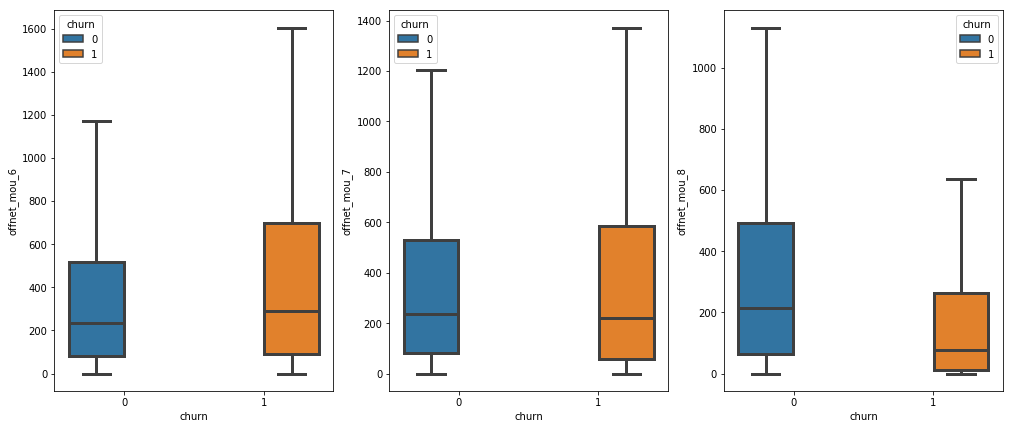

In [180]:
# let's analyze for offnet mou values for churned and non churned customers
analyze_feature('offnet_mou')

In [181]:
# define new derived column
# minutes of usage for good phase: onnet_mou_good_ph
telecom_data['offnet_mou_good_ph'] = (telecom_data.offnet_mou_6 + telecom_data.offnet_mou_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['offnet_mou_6','offnet_mou_7'],axis=1,inplace=True)

minutes of usage related variables within same operator network

In [182]:
#extract the minutes of usage related columns
onnet_cols =  telecom_data.columns[telecom_data.columns.str.contains('^onnet.*mou',regex=True)]

Churn Stats (mean and standard deviation):
{6: 'onnet_mou_6', 7: 'onnet_mou_7', 8: 'onnet_mou_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,269.74,284.59,261.14,469.65,503.63,492.60
Non Churned,417.01,342.18,178.84,664.33,592.37,428.76


<Figure size 1224x504 with 0 Axes>

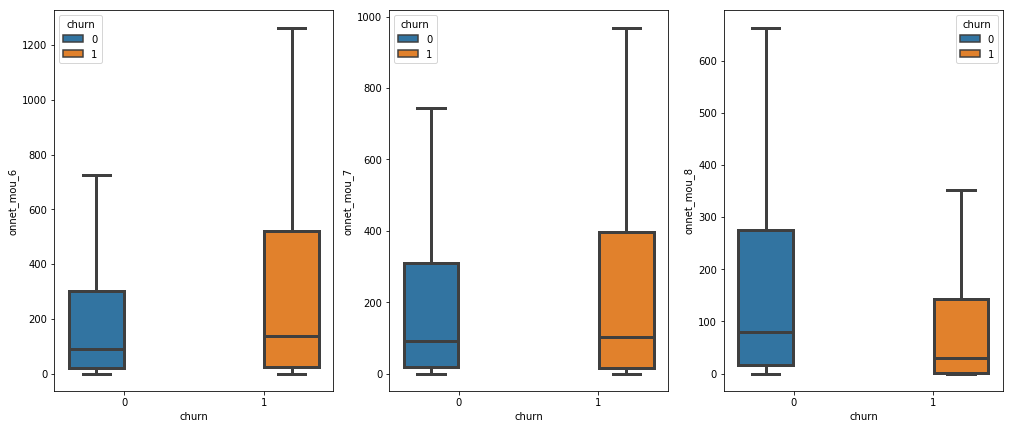

In [183]:
# analyze for offnet mou values for churned and non churned customers
analyze_feature('onnet_mou')

In [184]:
# Let us define new derived column
# minutes of usage for good phase: onnet_mou_good_ph
telecom_data['onnet_mou_good_ph'] = (telecom_data.onnet_mou_6 + telecom_data.onnet_mou_7)/2

# drop the original columns as these are not longer required
telecom_data.drop(['onnet_mou_6','onnet_mou_7'],axis=1,inplace=True)

In [185]:
#check summary stats for oc others and ic others mou
ls_others = telecom_data.columns[telecom_data.columns.str.contains('_others')]

print(telecom_data.loc[:,ls_others].describe())

        og_others_6   og_others_7   og_others_8   ic_others_6   ic_others_7  \
count  24612.000000  24614.000000  24115.000000  24612.000000  24614.000000   
mean       0.702357      0.049244      0.063426      1.245356      1.625078   
std        4.456459      2.950552      3.591182     15.245800     17.079858   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.060000      0.000000   
max      609.810000    370.130000    394.930000   1344.140000   1495.940000   

        ic_others_8  
count  24115.000000  
mean       1.327981  
std       13.608608  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.060000  
max     1209.860000  


In [186]:
#  define two new derived columns
# OG others for good phase: og_others_good_ph
# IC otherd for good phase: ic_others_good_ph
telecom_data['og_others_good_ph'] = (telecom_data.og_others_6 + telecom_data.og_others_7)/2
telecom_data['ic_others_good_ph'] = (telecom_data.ic_others_6 + telecom_data.ic_others_6)/2


# drop the original columns as these are not longer required
telecom_data.drop(['og_others_6','og_others_7','ic_others_6','ic_others_7'],axis=1,inplace=True)

In [187]:
is_more_than_20 = telecom_data.isnull().sum()/len(telecom_data) > 0.2
100*telecom_data.loc[:,is_more_than_20].isnull().sum()/len(telecom_data.loc[:,is_more_than_20])

date_of_last_rech_data_6    40.219824
date_of_last_rech_data_7    39.292566
date_of_last_rech_data_8    43.497202
night_pck_user_6            40.219824
night_pck_user_7            39.292566
night_pck_user_8            43.497202
fb_user_6                   40.219824
fb_user_7                   39.292566
fb_user_8                   43.497202
dtype: float64

In [188]:
# drop these columns as we have already captured internet volume usage and total data amount recharged.
# also we have captured day of last recharge shift as well.
telecom_data.drop(telecom_data.columns[is_more_than_20],axis=1,inplace=True)

In [189]:
# check how many variables are remaining!!
telecom_data.shape

(25020, 115)

In [190]:
is_na = telecom_data.isnull().sum()/len(telecom_data) > 0
100*telecom_data.loc[:,is_na].isnull().sum()/len(telecom_data.loc[:,is_na])

loc_og_t2o_mou            0.655476
std_og_t2o_mou            0.655476
loc_ic_t2o_mou            0.655476
last_date_of_month_7      0.087930
last_date_of_month_8      0.531575
onnet_mou_8               3.617106
offnet_mou_8              3.617106
roam_ic_mou_8             3.617106
roam_og_mou_6             1.630695
roam_og_mou_7             1.622702
roam_og_mou_8             3.617106
loc_og_t2t_mou_6          1.630695
loc_og_t2t_mou_7          1.622702
loc_og_t2t_mou_8          3.617106
loc_og_t2m_mou_6          1.630695
loc_og_t2m_mou_7          1.622702
loc_og_t2m_mou_8          3.617106
loc_og_t2f_mou_6          1.630695
loc_og_t2f_mou_7          1.622702
loc_og_t2f_mou_8          3.617106
loc_og_t2c_mou_6          1.630695
loc_og_t2c_mou_7          1.622702
loc_og_t2c_mou_8          3.617106
loc_og_mou_6              1.630695
loc_og_mou_7              1.622702
loc_og_mou_8              3.617106
std_og_t2t_mou_6          1.630695
std_og_t2t_mou_7          1.622702
std_og_t2t_mou_8    

In [191]:
telecom_data.loc[:,:] = telecom_data.loc[:,:].replace(np.NaN,0)

# Model building


In [192]:
# Putting feature variable to X
X = telecom_data.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_data['churn']


Additional feature engineering


In [193]:
# extract good phase feature list and 8th month feature list
f_good_ph = X.loc[:,X.columns.str.contains('good_ph')]
f_8 = X.loc[:,X.columns.str.contains('_8')]

In [194]:
# define function to calculate difference between 8th month feature and good phase feature
def FindDiff(x,y):      
    diff = 0.00
    if np.isnan(x) and np.isnan(y):
        diff = np.NAN
    elif np.isnan(y) and ~np.isnan(x):
        diff = x
    elif ~np.isnan(y)and np.isnan(x):
        diff = -y
    else:
        diff = x-y

    return(diff)    

In [195]:
# create a feature data frame copy from original features
X_diff = X.copy()

In [196]:
# extract features without any good phase or 8th month indicator.
features_to_explore = set(map(lambda x: x.replace("_good_ph", ""), f_good_ph))
features_to_explore

{'ic_others',
 'isd_ic_mou',
 'last_day_rch_amt',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'spl_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'total_rech_amt',
 'total_rech_amt_data',
 'total_rech_num',
 'vol_2g_mb',
 'vol_3g_mb'}

In [197]:
# create new derived columns for action phase.
for feat in features_to_explore:
    X_diff[feat+'_act_ph']= np.vectorize(FindDiff)(X_diff[feat+'_8'], X_diff[feat+'_good_ph'])

In [198]:
# drop 8th month columns as we have already derived action phase columns.
X_diff.drop(f_8,axis=1,inplace=True)

feature standardisation

In [199]:
# import standard scalar
from sklearn.preprocessing import StandardScaler


In [204]:
# extract columns
cols = X_diff.columns

# apply standard scalar
scaler = StandardScaler()

In [205]:
# convert to data frame
X_scaled = pd.DataFrame(X_diff, columns=cols)

In [208]:
mou_6 = telecom_data.columns[telecom_data.columns.str.contains('mou_6')]


In [209]:
mou_6


Index(['roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
       'total_og_mou_6'],
      dtype='object')

In [210]:
mou_og_cols6 = telecom_data.columns[telecom_data.columns.str.contains('.*_og_.*mou_6',regex=True)]


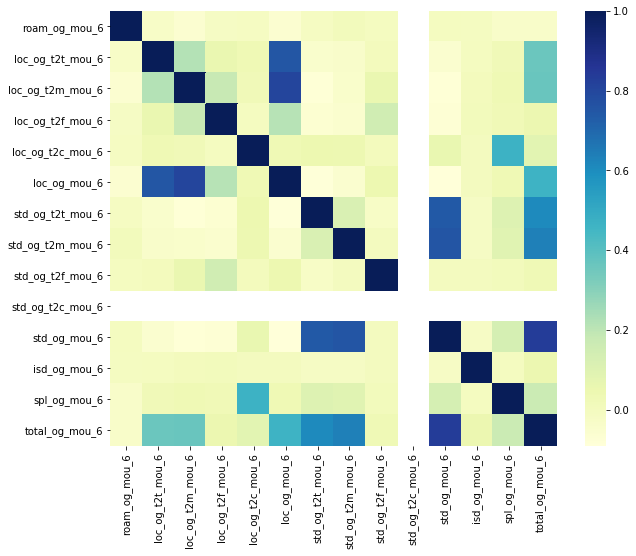

In [211]:
plt.figure(figsize=(10, 8))
sns.heatmap(telecom_data.loc[:,mou_og_cols6].corr(), cmap="YlGnBu")
plt.show()


In [212]:
print(telecom_data.loc[7,'total_og_mou_6'],telecom_data.loc[7,['loc_og_mou_6','std_og_mou_6','spl_og_mou_6','isd_og_mou_6','og_others_6']].sum())

print(telecom_data.loc[7,'std_og_mou_6'],telecom_data.loc[7,['std_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2f_mou_6','std_og_loc_mou_6']].sum())

print(telecom_data.loc[7,'loc_og_mou_6'],telecom_data.loc[7,['loc_og_t2m_mou_6','loc_og_t2t_mou_6','loc_og_t2f_mou_6','loc_og_2tc_mou_6']].sum())


487.53 487.52000000000004
60.86 60.849999999999994
422.16 422.15


In [215]:
ls_total_og_cols = telecom_data.columns[telecom_data.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]

print(ls_total_og_cols)

telecom_data.drop(ls_total_og_cols,axis=1,inplace=True)


Index([], dtype='object')


In [216]:
define good phase derived variables for all og components:
telecom_data['spl_og_mou_good_ph'] = (telecom_data.spl_og_mou_6 + telecom_data.spl_og_mou_7)/2
telecom_data['isd_og_mou_good_ph'] = (telecom_data.isd_og_mou_6 + telecom_data.isd_og_mou_7)/2
telecom_data['roam_og_mou_good_ph'] = (telecom_data.roam_og_mou_6 + telecom_data.roam_og_mou_7)/2
telecom_data['std_og_t2m_mou_good_ph'] = (telecom_data.std_og_t2m_mou_6 + telecom_data.std_og_t2m_mou_7)/2
telecom_data['std_og_t2t_mou_good_ph'] = (telecom_data.std_og_t2t_mou_6 + telecom_data.std_og_t2t_mou_7)/2
telecom_data['std_og_t2f_mou_good_ph'] = (telecom_data.std_og_t2f_mou_6 + telecom_data.std_og_t2f_mou_7)/2

telecom_data['loc_og_t2m_mou_good_ph'] = (telecom_data.loc_og_t2m_mou_6 + telecom_data.loc_og_t2m_mou_7)/2
telecom_data['loc_og_t2t_mou_good_ph'] = (telecom_data.loc_og_t2t_mou_6 + telecom_data.loc_og_t2t_mou_7)/2
telecom_data['loc_og_t2f_mou_good_ph'] = (telecom_data.loc_og_t2f_mou_6 + telecom_data.loc_og_t2f_mou_7)/2
telecom_data['loc_og_t2c_mou_good_ph'] = (telecom_data.loc_og_t2c_mou_6 + telecom_data.loc_og_t2c_mou_7)/2

SyntaxError: invalid syntax (<ipython-input-216-e95c0bf246c0>, line 1)

In [217]:
# drop all the original og mou variables
ls_og = telecom_data.columns[telecom_data.columns.str.contains('.*_og_.*mou_6|.*_og_.*mou_7',regex=True)]

print(ls_og)

telecom_data.drop(ls_og,axis=1,inplace=True)

Index(['roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7'],
      dtype='object')


In [218]:
#check for incoming mou variables

mou_ic_cols6 = telecom_data.columns[telecom_data.columns.str.contains('.*_ic_.*mou_6',regex=True)]

mou_ic_cols6


Index([], dtype='object')

In [223]:
#remove these columns for all months from the data set

ls_total_ic_cols = telecom_data.columns[telecom_data.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]

print(ls_total_ic_cols)

telecom_data.drop(ls_total_ic_cols,axis=1,inplace=True)

Index([], dtype='object')


In [225]:
# extract good phase feature list and 8th month feature list
f_good_ph = X.loc[:,X.columns.str.contains('good_ph')]
f_8 = X.loc[:,X.columns.str.contains('_8')]

In [226]:
# define function to calculate difference between 8th month feature and good phase feature
def FindDiff(x,y):      
    diff = 0.00
    if np.isnan(x) and np.isnan(y):
        diff = np.NAN
    elif np.isnan(y) and ~np.isnan(x):
        diff = x
    elif ~np.isnan(y)and np.isnan(x):
        diff = -y
    else:
        diff = x-y

    return(diff)

In [227]:
# create a feature data frame copy from original features
X_diff = X.copy()

In [228]:
features_to_explore = set(map(lambda x: x.replace("_good_ph", ""), f_good_ph))
features_to_explore


{'ic_others',
 'isd_ic_mou',
 'last_day_rch_amt',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'max_rech_amt',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'offnet_mou',
 'og_others',
 'onnet_mou',
 'roam_ic_mou',
 'spl_ic_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'total_rech_amt',
 'total_rech_amt_data',
 'total_rech_num',
 'vol_2g_mb',
 'vol_3g_mb'}

In [229]:
for feat in features_to_explore:
    X_diff[feat+'_act_ph']= np.vectorize(FindDiff)(X_diff[feat+'_8'], X_diff[feat+'_good_ph'])

In [230]:
X_diff.drop(f_8,axis=1,inplace=True)


In [231]:
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score

# define function to calculate and print model metrics.
def printMetrics(y_test,y_pred):
    cp = confusion_matrix(y_test,y_pred)
    sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
    specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
    precision = cp[1,1]/(cp[0,1]+cp[1,1])
    print('Confusion Matrix: \n',cp)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ",specificity)
    print("AUC Score: ", roc_auc_score(y_test,y_pred)) 
    print("Precision: ",precision)
    print("f1 Score: ",f1_score(y_test,y_pred))


In [235]:
#start by building as basic logistic regression model
from sklearn.linear_model import LogisticRegression
lsr = LogisticRegression()

In [237]:
# import standard scalar
from sklearn.preprocessing import StandardScaler



In [243]:

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=100)

In [249]:
from sklearn.metrics import confusion_matrix,roc_auc_score,f1_score

# define function to calculate and print model metrics.
def printMetrics(y_test,y_pred):
    cp = confusion_matrix(y_test,y_pred)
    sensitivity = cp[1,1]/(cp[1,0]+cp[1,1])
    specificity =  cp[0,0]/(cp[0,1]+cp[0,0])
    precision = cp[1,1]/(cp[0,1]+cp[1,1])
    print('Confusion Matrix: \n',cp)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ",specificity)
    print("AUC Score: ", roc_auc_score(y_test,y_pred)) 
    print("Precision: ",precision)
    print("f1 Score: ",f1_score(y_test,y_pred))

In [250]:
from sklearn.linear_model import LogisticRegression
lsr = LogisticRegression()

In [253]:
# import SMOTE sampler from imblearn library
from imblearn.over_sampling import SMOTE
smote = SMOTE(kind = "regular")

ModuleNotFoundError: No module named 'imblearn'

In [254]:
# function to undersample majority class
def MajorityClassUnderSampler(X_train,y_train):
    # create training data frame
    df_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)],axis=1)
    
    # select the minority class (in our case churn)
    df_train_minority_class  = df_train.loc[df_train.churn == 1,:]
    
    # create data frame with majority class samples same as minority class
    df_train_majority_undersampled = pd.concat([df_train_minority_class,df_train.loc[df_train.churn == 0,:].sample(df_train_minority_class.shape[0])])

    return df_train_majority_undersampled

In [261]:
df_train_mju = MajorityClassUnderSampler(X_train,y_train)

# extract features and labels
X_mju = df_train_mju.drop('churn',axis=1)
y_mju = df_train_mju.churn

In [262]:
from sklearn.decomposition import PCA

In [263]:
pca = PCA(svd_solver='randomized', random_state=101)
